In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

from statsmodels.tsa.arima.model import ARIMA

In [102]:
effects = pd.read_csv('/Users/abdouaziz/Desktop/Data visualization /Inflation project/Data visualization\InflationData1.csv')
effects = effects.rename(columns={'Inflation Rate YOY, From Previous Dec.':'Annual Inflation Rate', 'Events Affecting Inflation': 'Events'})
effects = effects.drop(columns= ['Federal Funds Rate'])

#handle missing data
effects.fillna(method= 'ffill', inplace=True )

effects

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
/var/folders/tn/qj_hk5sx1pb1pb683xk12sfr0000gn/T/ipykernel_20180/530087878.py:1: SyntaxWarning: invalid escape sequence '\I'
  effects = pd.read_csv('/Users/abdouaziz/Desktop/Data visualization /Inflation project/Data visualization\InflationData1.csv')
/var/folders/tn/qj_hk5sx1pb1pb683xk12sfr0000gn/T/ipykernel_20180/530087878.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  effects.fillna(method= 'ffill', inplace=True )


,Year,Annual Inflation Rate,Business Cycle*,Events
0,1929,0.60%,August peak,Market crash
1,1930,-6.40%,Contraction (-8.5%),Smoot-Hawley Tariff Act
2,1931,-9.30%,Contraction (-6.4%),Dust Bowl began
3,1932,-10.30%,Contraction (-12.9%),Hoover tax hikes
4,1933,0.80%,Contraction ended in March (-1.2%),FDR’s New Deal
...,...,...,...,...
90,2019,2.30%,Expansion (2.5%),Deflation in oil and gas prices
91,2020,1.40%,Contraction (-2.2%),COVID-19 pandemic
92,2021,7.00%,Expansion (5.8%),COVID-19 pandemic
93,2022,6.50%,Expansion (1.9%),Russia invades Ukraine


In [103]:
effects['Year'] = effects['Year'].astype(int)
# Remove '%' and convert to float
effects['Annual Inflation Rate'] = effects['Annual Inflation Rate'].str.rstrip('%').astype(float)

# If you need it as an integer (e.g., scaled by 100 for a whole number percentage), you can do:
# effects['Annual Inflation Rate'] = (effects['Annual Inflation Rate'] * 100).astype(int)

#effects['Annual Inflation Rate'] = effects['Annual Inflation Rate'].astype(int)
effects['Business Cycle*'] = effects['Business Cycle*'].astype(str)

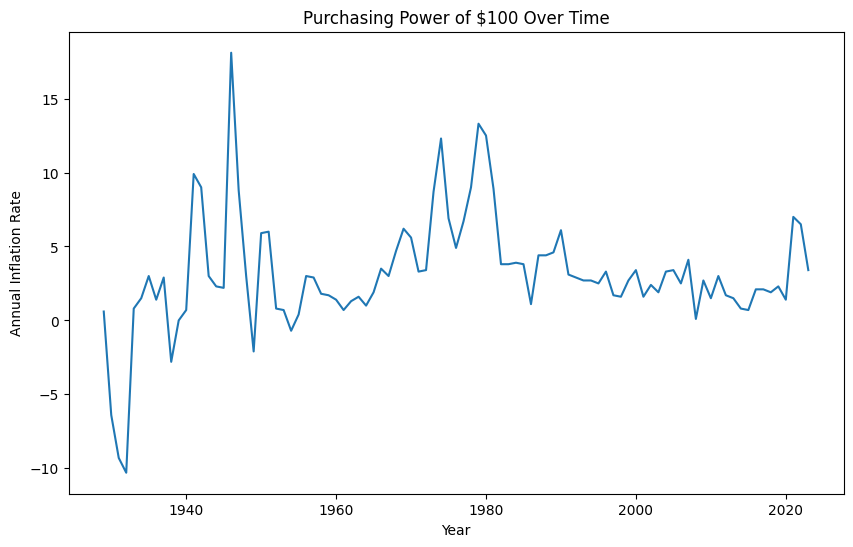

In [104]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=effects, x='Year', y='Annual Inflation Rate')
plt.title('Purchasing Power of $100 Over Time')
plt.show()


In [105]:
#apply machine learning model Split data into training and testing sets
X = effects[['Annual Inflation Rate',]]
y = effects['Year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
#start with linear regression using annual inflation rate and Year
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [107]:
#Evaluate using metrics like Mean Absolute Error (MAE):
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 25.288716457342712


In [108]:
#for future predictions of purchasing power
arima_model = ARIMA(effects['Year'], order=(5, 1, 0))
arima_fit = arima_model.fit()
forecast = arima_fit.forecast(steps=10)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [109]:
effects.to_csv('/Users/abdouaziz/Desktop/Data visualization /Inflation project/processedData.csv', index=False)

In [110]:
valueOf100 = pd.read_csv('/Users/abdouaziz/Desktop/Data visualization /Inflation project/Value of 100.csv')
valueOf100


,Year,Amount,Inflation Rate
0,1900,101.20,0.01
1,1901,102.41,0.01
2,1902,103.61,0.01
3,1903,106.02,0.02
4,1904,107.23,0.01
...,...,...,...
120,2020,3118.21,0.01
121,2021,3264.70,0.05
122,2022,3525.97,0.08
123,2023,3671.11,0.04


In [111]:
consumerPriceIndex = pd.read_csv('/Users/abdouaziz/Desktop/Data visualization /Inflation project/processedData1.csv')
consumerPriceIndex

,Year,Events,Consumer Price Index
0,1910,Steady economy,9.5
1,1911,Steady economy,9.6
2,1912,Steady economy,9.7
3,1913,Steady economy,9.9
4,1914,WWI begins,10.0
...,...,...,...
109,2019,Deflation in oil and gas prices,255.7
110,2020,COVID-19 pandemic,258.8
111,2021,COVID-19 pandemic,271.0
112,2022,Russia invades Ukraine,292.0


In [112]:
valueOf100.dtypes

Year                int64
Amount            float64
Inflation Rate    float64
dtype: object

In [113]:
consumerPriceIndex.dtypes


Year                      int64
Events                   object
Consumer Price Index    float64
dtype: object

In [114]:
#merge csv's 
inflationData = pd.merge(valueOf100, consumerPriceIndex, on= 'Year')
#rename Amount to Value Of $100
inflationData = inflationData.rename(columns={'Amount ':'Value of 100'})
#save csv into files
inflationData.to_csv('/Users/abdouaziz/Desktop/Data visualization /Inflation project/inflationData.csv')


In [115]:
inflationData

,Year,Value of 100,Inflation Rate,Events,Consumer Price Index
0,1910,114.46,0.04,Steady economy,9.5
1,1911,114.46,0.00,Steady economy,9.6
2,1912,116.87,0.02,Steady economy,9.7
3,1913,119.28,0.02,Steady economy,9.9
4,1914,120.48,0.01,WWI begins,10.0
...,...,...,...,...,...
109,2019,3080.21,0.02,Deflation in oil and gas prices,255.7
110,2020,3118.21,0.01,COVID-19 pandemic,258.8
111,2021,3264.70,0.05,COVID-19 pandemic,271.0
112,2022,3525.97,0.08,Russia invades Ukraine,292.0


In [116]:
#To correctly split our dataset into training and testing sets for machine learning tasks, 
# you need to decide which columns will be features (independent variables) 
# and which column will be the target (dependent variable). Here's how you can do it step-by-step:
x = inflationData[['Inflation Rate', 'Year', 'Consumer Price Index']] #features 
y = inflationData[['Value of 100']] #Target

In [117]:
#Split the Data: Use train_test_split from scikit-learn to split the data into training and testing sets:
#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (91, 3)
x_test shape: (23, 3)
y_train shape: (91, 1)
y_test shape: (23, 1)


In [118]:
#initialize linear regression
model = LinearRegression()
#train the model
model.fit(x_train, y_train)
#predict outcomes
y_pred = model.predict(x_test)




In [119]:
# Assuming y_test and y_pred are defined:
# y_test: actual values
# y_pred: predicted values

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


Mean Absolute Error (MAE): 5.193286616131215
R^2 Score: 0.9999194068577119


In [120]:
# Example CPI and Inflation Rate estimates for 2040 (hee we are predicting the value by inputing the year, inflation rate and cpi )
year = 2040
inflation_rate_2040 = 2.5  # Example estimate
cpi_2040 = 320  # Example estimate

# Prepare input
input_2040 = [[year, inflation_rate_2040, cpi_2040]]

# Predict the value of $100
value_2040 = model.predict(input_2040)[0]

# Extract the value from the NumPy array and format it as a float
print(f"The predicted value of $100 in 2040 is: ${value_2040[0]:.2f}")



The predicted value of $100 in 2040 is: $-76239.17


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [123]:
# here we are preidcting the value of $100 by just inputing the year
# we are first going to train the model for just the year and the value of $100

# Load your dataset
data = pd.read_csv('/Users/abdouaziz/Desktop/Data visualization /Inflation project/inflationData.csv')

# Use only 'Year' as the feature
x = data[['Year']]  # Feature: Only Year
y = data['Value of 100']  # Target: Value of $100

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [124]:
# Input the year for prediction (e.g., 2040)
year_input = 2040  # Replace with the desired year

# Prepare the input for prediction (reshaped as 2D array)
input_year = [[year_input]]

# Predict the value of $100 for the given year
predicted_value = model.predict(input_year)[0]

# Display the prediction
print(f"The predicted value of $100 in {year_input} is: ${predicted_value:.2f}")


The predicted value of $100 in 2040 is: $3146.47


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [126]:
#now lets predict the cpi
# Load your dataset
data = pd.read_csv('/Users/abdouaziz/Desktop/Data visualization /Inflation project/inflationData.csv')

# Use only 'Year' as the feature
x = data[['Year']]  # Feature: Only Year
y = data['Consumer Price Index']  # Target: CPI

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [127]:
# Input the year for prediction (e.g., 2040)
year_input = 2040  # Replace with the desired year

# Prepare the input for prediction (reshaped as 2D array)
input_year = [[year_input]]

# Predict the value of $100 for the given year
predicted_value = model.predict(input_year)[0]

# Display the prediction
print(f"The predicted CPI in {year_input} is: ${predicted_value:.2f}")

The predicted CPI in 2040 is: $261.17


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [128]:
#now lets pedict the inflation 
#now lets predict the cpi
# Load your dataset
data = pd.read_csv('/Users/abdouaziz/Desktop/Data visualization /Inflation project/inflationData.csv')

# Use only 'Year' as the feature
x = data[['Year']]  # Feature: Only Year
y = data['Inflation Rate']  # Target: Inflation rate

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [130]:
# Input the year for prediction (e.g., 2040)
year_input = 2040  # Replace with the desired year

# Prepare the input for prediction (reshaped as 2D array)
input_year = [[year_input]]

# Predict the value of $100 for the given year
predicted_value = model.predict(input_year)[0]

# Display the prediction
print(f"The predicted inflation in {year_input} is: {predicted_value:.2f}")

The predicted inflation in 2040 is: 0.03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [125]:
inflationData

,Year,Value of 100,Inflation Rate,Events,Consumer Price Index
0,1910,114.46,0.04,Steady economy,9.5
1,1911,114.46,0.00,Steady economy,9.6
2,1912,116.87,0.02,Steady economy,9.7
3,1913,119.28,0.02,Steady economy,9.9
4,1914,120.48,0.01,WWI begins,10.0
...,...,...,...,...,...
109,2019,3080.21,0.02,Deflation in oil and gas prices,255.7
110,2020,3118.21,0.01,COVID-19 pandemic,258.8
111,2021,3264.70,0.05,COVID-19 pandemic,271.0
112,2022,3525.97,0.08,Russia invades Ukraine,292.0


In [137]:
import streamlit as st
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load your trained model or retrain it
# Initialize and train the Linear Regression model
# here we are preidcting the value of $100 by just inputing the year
# we are first going to train the model for just the year and the value of $100

# Load your dataset
data = pd.read_csv('/Users/abdouaziz/Desktop/Data visualization /Inflation project/inflationData.csv')

# Use only 'Year' as the feature
x = data[['Year']]  # Feature: Only Year
y = data['Value of 100']  # Target: Value of $100

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# App interface
st.title("Predict the Future Value of $100")
st.write("""
This app predicts the future value of $100 based on historical trends.
""")

# User input for year
year_input = st.number_input("Enter a year (e.g., 2040):", min_value=2020, max_value=2100, step=1)

if st.button("Predict"):
    # Prepare input and make prediction
    input_year = np.array([[year_input]])
    predicted_value = model.predict(input_year)[0]
    
    st.success(f"The predicted value of $100 in {year_input} is: ${predicted_value:.2f}")

    


2024-11-26 19:03:53.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 19:03:53.470 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 19:03:53.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 19:03:53.520 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 19:03:53.523 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 19:03:53.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 19:03:53.534 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-26 19:03:53.537 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar